### SPAM SMS DETECTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc

import warnings
warnings.filterwarnings('ignore')

### Reading and Describing Data

In [2]:

df = pd.read_csv(r"C:/Users/HP/PGA 32/Machine Learning/CODSOFT/SMS Spam Detection/spam.csv",  encoding ='latin', usecols = ['v1','v2'])

In [3]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.shape

(5572, 2)

In [7]:
df.describe().T

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30


### Missing Value

In [8]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [9]:
df.describe().T

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30


In [10]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [11]:
df["v1"].nunique()


2

In [12]:
df["v1"].unique()

array(['ham', 'spam'], dtype=object)

In [13]:
df["v1"].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [14]:
df["v1"].value_counts(normalize=True)

v1
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64

<Axes: xlabel='v1'>

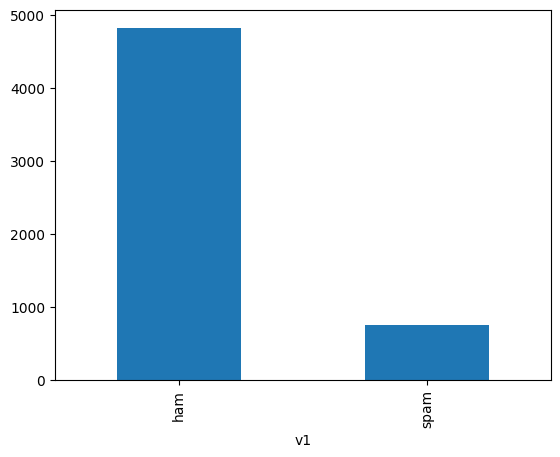

In [15]:
df["v1"].value_counts().plot(kind="bar")

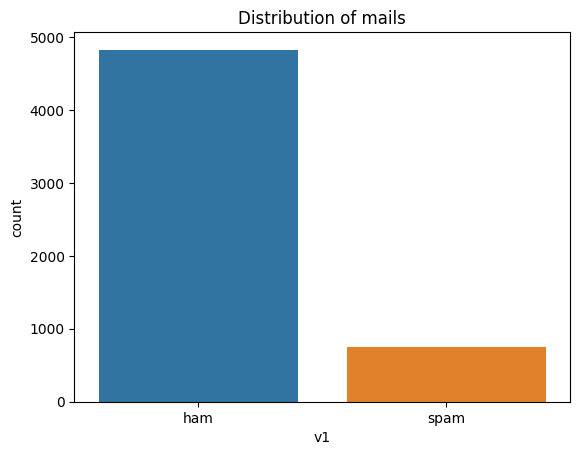

In [16]:
sns.countplot(data=df, x='v1')
plt.xlabel('v1')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

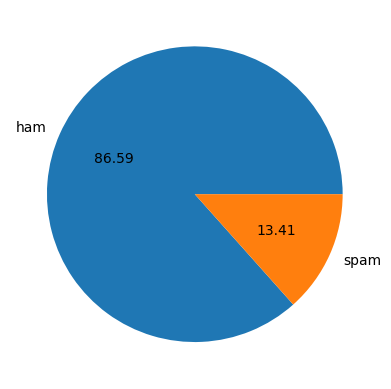

In [17]:
plt.pie(df['v1'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

## Changing column name

In [18]:
v1 = {"v1":"Category"}
df.rename(columns = v1,inplace = True)

In [19]:
v2 = {"v2":"Messages"}
df.rename(columns = v2,inplace = True)

### Label Encoding

In [20]:
df["Category"]=df["Category"].replace({"ham":1,"spam":0})

In [21]:
df.head()

,Category,Messages
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int64 
 1   Messages  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [39]:

X = df["Messages"]
y = df["Category"]

In [40]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Messages, Length: 5572, dtype: object

In [41]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64

## Splitting the data into training data and test data

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## TF-IDF Vectorizer

In [43]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

In [44]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [45]:
X_test_tfidf = tfidf_vectorizer.transform(X_test)

### Naive Bayes Regression Model

In [46]:
from sklearn.naive_bayes import MultinomialNB

In [47]:
naive_b = MultinomialNB()

In [48]:
naive_b.fit(X_train_tfidf, y_train)

MultinomialNB()

In [50]:
print(f'The Train_accuracy: {naive_b.score(X_train_tfidf, y_train)*100:.2f}')
print(f'The Test_accuracy: {naive_b.score(X_test_tfidf, y_test)*100:.2f}')

The Train_accuracy: 98.59
The Test_accuracy: 97.22


### Logistic Regression

In [51]:
Log_Reg = LogisticRegression()
Log_Reg.fit(X_train_tfidf, y_train)

LogisticRegression()

In [54]:
print(f'The Test_accuracy: {Log_Reg.score(X_test_tfidf,y_test)*100:.2f}')
print(f'The Train_accuracy: {Log_Reg.score(X_train_tfidf, y_train)*100:.2f}')

The Test_accuracy: 95.78
The Train_accuracy: 97.04


## Support Vector Machine Model

In [56]:
from sklearn.svm import SVC

In [57]:
SVM = SVC(kernel='linear', C=1)

In [59]:
SVM.fit(X_train_tfidf, y_train)

SVC(C=1, kernel='linear')

In [60]:
y_prediitttt = SVM.predict(X_test_tfidf)

In [61]:
print(f'The Test_accuracy: {SVM.score(X_test_tfidf,y_test)*100:.2f}')
print(f'The Train_accuracy: {SVM.score(X_train_tfidf, y_train)*100:.2f}')

The Test_accuracy: 97.94
The Train_accuracy: 99.66


## Test the model with an email messages

In [62]:
new_emails = [
    "Aight, I'll hit you up when I get some cash",
    "GENT! We are trying to contact you. Last weekends draw shows that you won a å£1000 prize GUARANTEED. Call 09064012160. Claim Code K52. Valid 12hrs only. 150ppm",
    "Going for dinner.msg you after.",
    "Your free ringtone is waiting to be collected. Simply text the password \MIX\" to 85069 to verify. Get Usher and Britney. FML"]

new_emails_features = tfidf_vectorizer.transform(new_emails)
predictions = naive_b.predict(new_emails_features)
for email, prediction in zip(new_emails, predictions):
    if prediction == 1:
        print(f"'{email}' is classified as Ham Mail")
    else:
        print(f"'{email}' is classified as Spam Mail")

'Aight, I'll hit you up when I get some cash' is classified as Ham Mail
'GENT! We are trying to contact you. Last weekends draw shows that you won a å£1000 prize GUARANTEED. Call 09064012160. Claim Code K52. Valid 12hrs only. 150ppm' is classified as Spam Mail
'Going for dinner.msg you after.' is classified as Ham Mail
'Your free ringtone is waiting to be collected. Simply text the password \MIX" to 85069 to verify. Get Usher and Britney. FML' is classified as Spam Mail


# Project Report
## All Train, Test Accuracy Reports through visualization

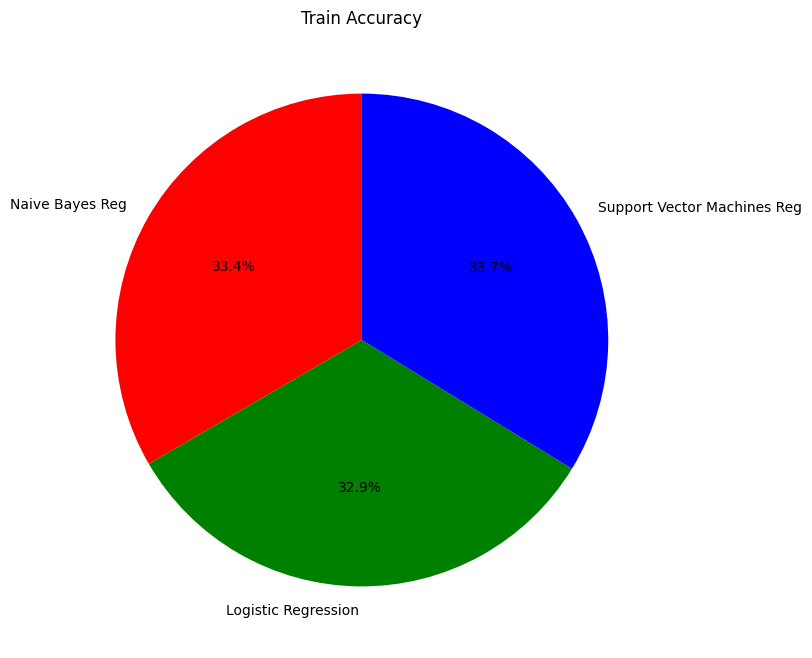

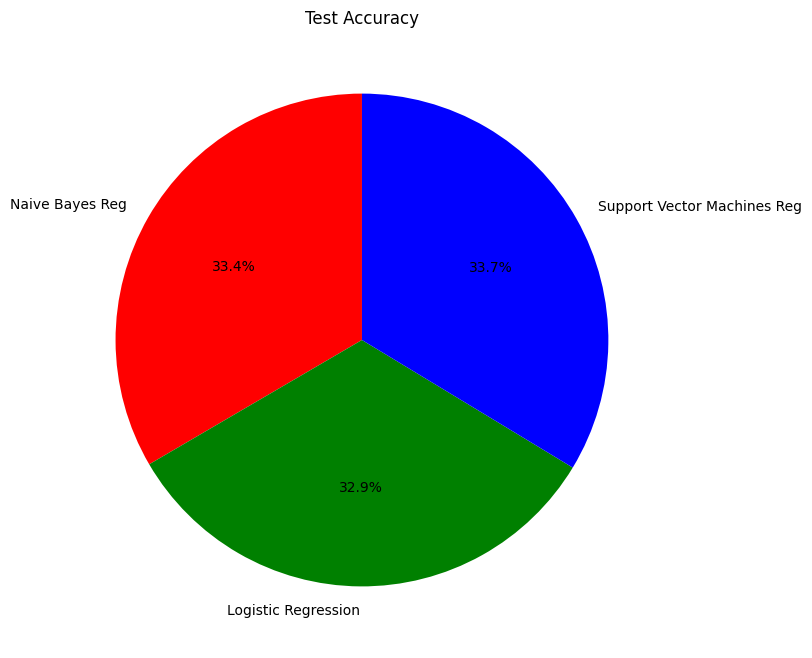

In [63]:
models = ["Naive Bayes Reg", "Logistic Regression", "Support Vector Machines Reg"]
train_accuracies = [98.59, 97.04, 99.66]
test_accuracies = [97.22, 95.78, 97.94]

colors = ['red', 'green', 'blue']

plt.figure(figsize=(8, 8))
plt.pie(train_accuracies, labels=models, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Train Accuracy")
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(test_accuracies, labels=models, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Test Accuracy")
plt.show()

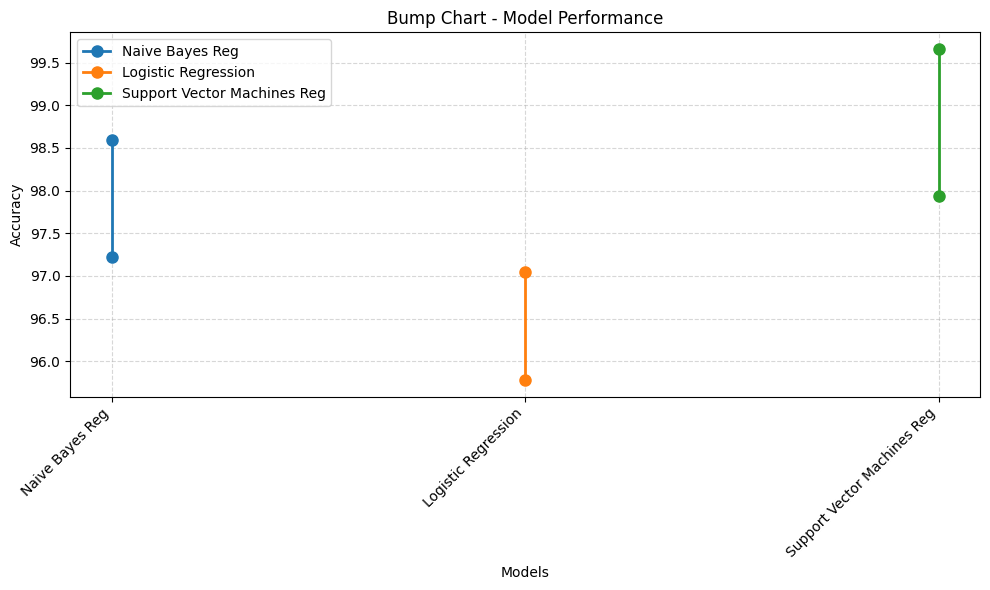

In [64]:
import matplotlib.pyplot as plt
import numpy as np

models = [ "Naive Bayes Reg", "Logistic Regression",  "Support Vector Machines Reg"]
train_accuracies = [98.59, 97.04, 99.66]  
test_accuracies = [97.22, 95.78, 97.94]  

line_width = 2

x = np.arange(len(models))

plt.figure(figsize=(10, 6))
for i in range(len(models)):
    plt.plot([x[i], x[i]], [train_accuracies[i], test_accuracies[i]], marker='o', markersize=8, linewidth=line_width, label=models[i])

plt.title("Bump Chart - Model Performance")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend()

plt.xticks(x, models, rotation=45, ha="right")

plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()